## Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Different Searching Algorithms 

In [2]:
df_path_lengths = pd.read_csv("comparison_data/path_lengths.csv")

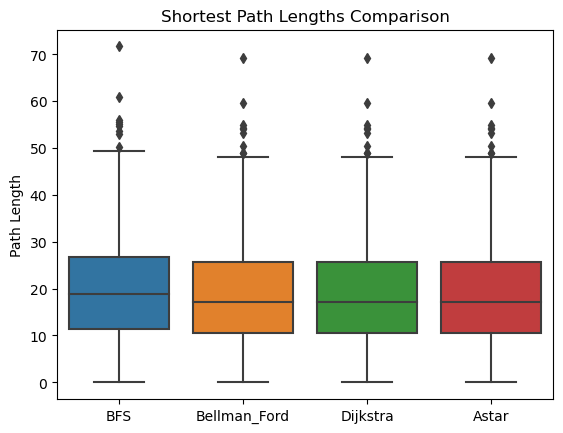

In [3]:
sns.boxplot(data=df_path_lengths)
plt.title('Shortest Path Lengths Comparison')
plt.ylabel('Path Length')
plt.show()

In [4]:
df_path_lengths_astar = pd.read_csv("comparison_data/path_lengths_astar.csv")

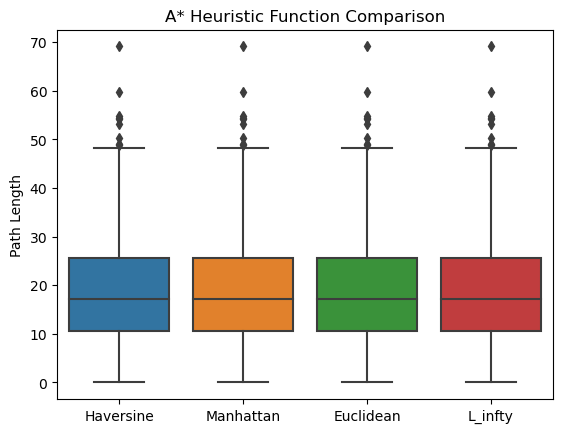

In [5]:
sns.boxplot(data=df_path_lengths_astar)
plt.title("A* Heuristic Function Comparison")
plt.ylabel('Path Length')
plt.show()

In [6]:
df_alg_times = pd.read_csv("comparison_data/alg_times.csv")
df_alg_times = df_alg_times.round()
df_alg_times

,BFS,Bellman_Ford,Dijkstra,Astar,Haversine,Manhattan,Euclidean,L_infty
0,53.0,197853.0,145.0,81.0,80.0,363.0,378.0,334.0
